In [2]:
from sklearn.datasets import fetch_california_housing
#from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="house_prices", as_frame=True)

warnings.filterwarnings(action='ignore')

dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target


In [34]:
dataset.head(3)

In [5]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(fit_intercept=True)

In [6]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
y = dataset['target'].values # y can be a vector

KeyError: 'RM'

In [37]:
linear_regression.fit(X,y) #fit을 이용해서 학습

LinearRegression(normalize=False)

In [38]:
print (linear_regression.coef_)
print (linear_regression.intercept_)

[9.10210898]
-34.670620776438554


# 비용함수를 사용한 회귀모델

In [39]:
import numpy as np
# 비용함수는 하이퍼 파라미터이다
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])
y = np.array([85, 95, 70, 65, 70])

In [40]:
def squared_cost(v,e):
 return np.sum((v-e)**2) #MSE mean square error

In [41]:
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


# 의사역행렬 방법을 이용한 최적화

* 회귀분석을 해결하고 비용 함수를 최소화하면서 데이터의 계수 벡터를 얻기 위한 분석적 공식은 아래와 같다.

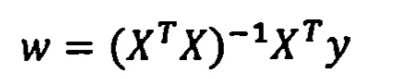

* Numpy의 np.linalg.inv를 사용해 역행렬을 구하여 w의 값을 구할수 있다.


In [42]:
observations = len(dataset)
X  = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
Xb = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

def matrix_inverse(X,y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)),np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

print (matrix_inverse(Xb, y))
print (matrix_inverse(Xb, y, pseudo=True))
print (normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


In [43]:
Xb

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

# 경사하강법

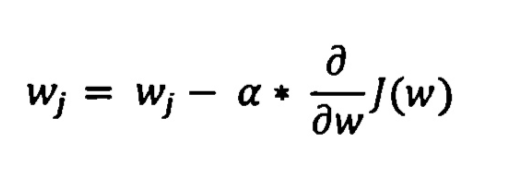

In [44]:
observations = len(dataset)
# a는 러닝매이트라는 하이퍼 파라미터이나 너무 크면 내가 원하는 지점을 지나갈수도있다.
X  = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
X = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

In [45]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  


In [46]:
alpha = 0.048
w, path = optimize(X,y,alpha, eta = 10**-12, iterations = 25000)
print ("These are our final coefficients: %s" % w)
print ("Obtained walking on this path of squared loss %s" % path)

# Just as a reminder, we previously estimated by other methods that
# the best solution for our coefficients is w = [9.10210898, -34.67062078]

These are our final coefficients: [9.102103788009451, -34.67058774206589]
Obtained walking on this path of squared loss [382347.1977645273, 23902.521961393577, 22496.563497364674, 22164.53379342263, 22086.12200024353, 22067.604351862785, 22063.23124307837, 22062.198494208365, 22061.954601298065, 22061.897003799368, 22061.88340163335, 22061.88018935983, 22061.879430752615, 22061.879251600716, 22061.87920929239, 22061.879199300893, 22061.879196941318, 22061.879196384078, 22061.879196252485, 22061.879196221405, 22061.879196218608]


# 정리
* 역행렬을 이용하여 푸는 문제의 유일한 문제는 복잡성이다. 
* numpy의 역행렬을 구하는 함수의 시간 복잡도는 O(n^2)으로 추정할 수 있다. 
* 데이터의 건수가 1000개의 관측치로 작업을 진행할 경우 최악의 경우 10^9의 계산이 필요하다. 
* 10^6의 관측치로 작업할 때는 회귀 문제에 대한 해결책을 찾는데 필요한 계산 횟수가 10^18로 증가할 수 있다. 
* 경사 하강법은 휠씬 적은 계산을 사용해 선형회귀분석의 비용 함수를 최소화할 수 있는 기법이다. 
* 경사 하강법의 시간 복잡도는 O(n*p), n은 관측치, p는 변수의 수이다. 그렇기 때문에 회귀계수의 구현이 가능하다. 